In [55]:
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

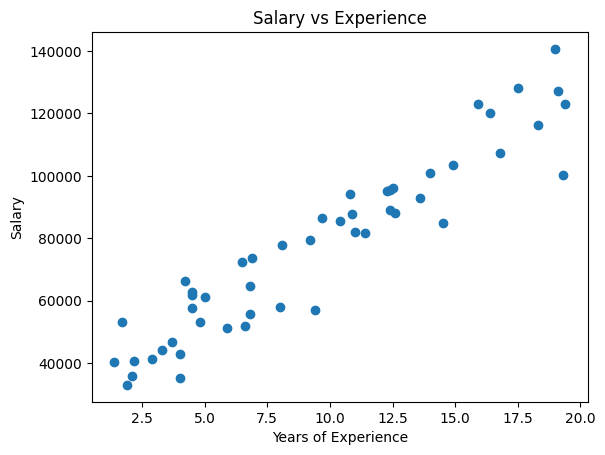

In [17]:
#making a scatter plot
df = pd.read_csv('extended_salary_data.csv')
plt.scatter(df.values[:, 0], df.values[:, 1])
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary vs Experience")
plt.show()

In [21]:
#computing basic statistics for each column
YofE_mean = df["YearsExperience"].mean()
YofE_median = df["YearsExperience"].median()
YofE_std = df["YearsExperience"].std()
Salary_mean = df["Salary"].mean()
Salary_median = df["Salary"].median()
Salary_std = df["Salary"].std()

In [52]:
#training the model
X_train, X_test, y_train, y_test = train_test_split(df["YearsExperience"].values, df["Salary"].values, test_size = 0.2)
X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
reg = LinearRegression()
reg.fit(X_train, y_train)
print(reg.coef_)
print(reg.intercept_)

[[4951.99150456]]
[29671.11730976]


Mean Absolute Error:  5602.414523500291
Mean Squared Error:  40922400.10874201


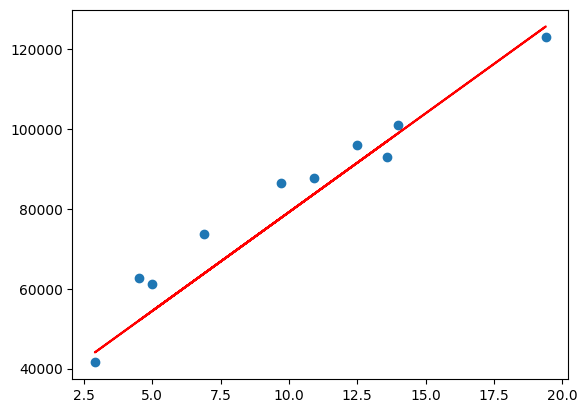

In [53]:
#Evaluating the model
y_pred = reg.predict(X_test.reshape(-1, 1))
plt.scatter(X_test, y_test)
MAE = mae(y_test, y_pred)
print("Mean Absolute Error: ", MAE)
MSE = mse(y_test, y_pred)
print("Mean Squared Error: ", MSE)
plt.plot(X_test, y_pred, color = 'red')

In [85]:
#bonus task
NumProjects = np.random.randint(1, 3, (len(df), 1))
for i in range(len(df)):
  NumProjects[i] = NumProjects[i]*df["YearsExperience"][i]
df["NumProjects"] = NumProjects
X = df[['YearsExperience', 'NumProjects']]
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
reg2 = LinearRegression()
reg2.fit(X_train, y_train)
print(reg2.coef_)
print(reg2.intercept_)
y_pred = reg2.predict(X_test)
MAE = mae(y_test, y_pred)
print("Mean Absolute Error: ", MAE)
MSE = mse(y_test, y_pred)
print("Mean Squared Error: ", MSE)

[4202.7747127   415.48759945]
32424.17113034676
Mean Absolute Error:  8276.884153236533
Mean Squared Error:  97515754.71645527
